<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_5_Threats_Type_1_and_2_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ICE-5**: Threats to the experiment.
###**INSTRUCTIONS**:
#####Provide your observation/summary for all tutorials and tasks. Marks will be deducted for those who dont write the summary.
#####Print this file as pdf and submit both pdf and .ipynb file(No screenshots). Not submitting any of these files will impact their grades.

#Task 1:(30%)

Question 1:
Define internal, external and construct validities and explain each with an example. Also summarize the threats to each of them.

**Internal validity** is the degree to which we can appropriately conclude that the changes in X caused the changes in Y. For example, the impact of advertisements on sales of specific items. Another example could be, a new teaching style improving results of that class.

**External validity** covers the generalizability aspect of that experiment. For an experiment, we randomly choose subjects from the population of interest or sometimes subjects which are ready to participate in the experiment or simply convenience samples. Then after the experiment, how to generalize the outcome from the inputs provided by these subjects to a larger population or is external validity. For example, generalizing experiment results from one school to all schools in county or state.

**Construct validity** is about measuring the outcome, which describes how well the concept or construct can be measured from this experiment for the target learning and inference. Body Mass Index to measure obesity or the IQ test from Stanford-Binet are real world examples for construct validity.

**Threats** for internal validity could be not considering external relevant factors like running car ads on kids channels won't fetch sales. Bias in selecting students (all below average) for testing the new teaching style or not using the relevant testing technique.As external validity is about generalization and if we choose some convenience sample which cannot represent the target population, this is a threat. Bias like gender, age, ethnicity specific samples can't be generalized to a shared population.
Changing the source in between for data collection or changing the survey questions can be categorized as instrumental changes and are a real threat to construct validity. There can be domain specific construct validity threats like decrease in accuracy of sensor or instrument.


Question 2: Write a short note on placebo effect.

As per definition, If subjects know which treatment they are receiving and
believe that it will affect the outcome, then we may be measuring the effect of the belief rather than the effect of the treatment, in medicine it is called the placebo effect.

Placebo effect mentions the impact of the mind or in other words patient's psychology and belief, impacting the overall wellbeing and outcomes. For example, belief in effectiveness from getting a treatment from a specific doctor is more important than treatment itself. Patients responding with reduced pain even with a sugar pill instead of pain killer while believing they are receiving real treatment is an example of placebo effect.


Question 3: Differentiate between double and triple blinding.

Blinding is a method to minimize bias where patients are prevented from knowing the level of care so their belief system should not impact the results at a higher degree. There are multiple entities or stakeholders involved in an experiment like subject, experimenter and the rater of the outcome or the person who is doing statistical analysis.

If the subject and experimenter both are blinded, which means both are not aware of the treatment which subject is receiving is called double binding. In such cases bias from experimenter and placebo from subject can be minimized, for example experimenter if aware of the subjects receiving real medicine or sugar pill, could subconsciously be more encouraging to the former. Double blinding minimizes that impact.

In cases where the person who is running statistical analysis is also not aware about the actual treatments is a triple blinding example. This helps overcome any bias from analysts which might influence the conclusion.


##Tutorial:Type 1 Error

1.Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
sns.set(color_codes=True)

2.Here we create a population of 1000 elements with a mean of 100 and a standard deviation of 20.

<ipython-input-2-bba917e734c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pop)


<Axes: ylabel='Density'>

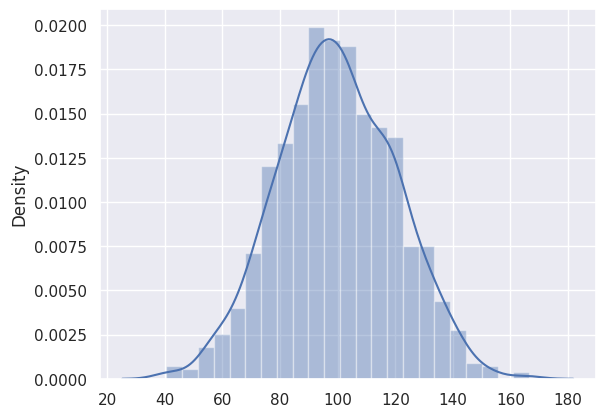

In [ ]:
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

3.Lets take two samples from this population and comment on the difference between their means and standard deviations.

In [ ]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(40.55096247394107, 152.69856143844666), mean=100.81445625595002, variance=455.21393644309217, skewness=-0.04996105684826787, kurtosis=-0.20957090735657324)

In [ ]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(40.6964344303715, 141.50217296010166), mean=99.34161372076984, variance=401.88466689791926, skewness=-0.1347655112658593, kurtosis=-0.33188043518190513)

4.T-test result.

In [ ]:
# test the sample means
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=0.5030844852850338, pvalue=0.6154640379271301, df=198.0)

<ipython-input-6-9f3f09cc543a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample1, label='Sample1')
<ipython-input-6-9f3f09cc543a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample2, label='Sample2')


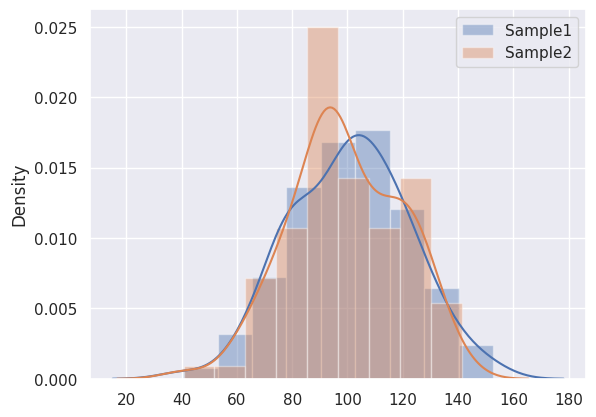

In [ ]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1')
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()

The following steps shows us how alpha affects the rate of type 1 errors.

Creating a population distribution and specifying a number of hypothesis tests in numtests. Next, we create a list of alpha values to explore alpha_set.Also create a pandas data frame to store 5000 results.

In [ ]:
import pandas as pd

numTests = 100
alphaSet = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
columns = ['err', 'p_val', 'alpha']
sigTests = pd.DataFrame(columns=columns)

# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)

# Create a counter for dataframe index values
counter = 1

Run the t-test on samples from distribution numTests x alphaSet times

In [ ]:
# Run the t-test on samples from distribution numTests x slphaSet times

for i in range(1,numTests+1):

    for alpha in alphaSet:

        # take two samples from the same population
            samp1 = np.random.choice(pop,100,replace=True)
            samp2 = np.random.choice(pop,100,replace=True)

            # test sample means
            result = stats.ttest_ind(samp1, samp2)

            # Evaluate whether Null hypothesis for TYPE I error
            if result[1] < alpha:
                 sigTests.loc[counter] = [1, result[1], alpha]
            else:
                 sigTests.loc[counter] = [0, result[1], alpha]

            counter += 1

Finding P-values for each of the alpha values.

In [ ]:
sigTests.head()

,err,p_val,alpha
1,0.0,0.575163,0.001
2,0.0,0.915931,0.010
3,0.0,0.419118,0.050
4,0.0,0.485490,0.100
5,0.0,0.779401,0.200


<Axes: title={'center': 'TYPE I ERROR - FALSE POSITIVES'}, xlabel='alpha'>

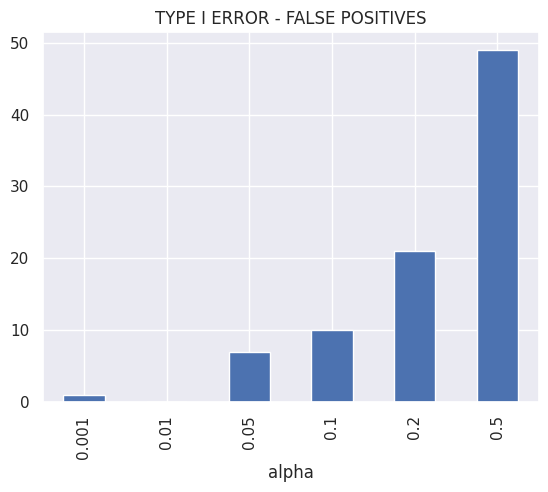

In [ ]:
# group type 1 error by values of alpha
group_error = sigTests.groupby('alpha')['err'].sum()
group_error.plot.bar(title = "TYPE I ERROR - FALSE POSITIVES")

Grouped data clearly shows that as value of alpha is increases from .001 to 0.5, the probability of TYPE I errors also increase.

###Write your observations of the above tutorial here(10%)

**Observation:**

When p-value is greater than significance level (alpha), we cannot reject the null hypothesis. Which means there is no difference in samples (no difference in means in above case).

Type I error is, when we reject null hypothesis (H0) even when it's true and there is no significant difference.

In the above tutorial, we created 2 samples from a single population with specific mean and standard deviation. We are aware that there is not much difference in both sample's mean and standard deviation.

While performing t-test, as we increase the significance level, chances of rejecting the null hypothesis increases, because p-value becomes less than alpha in that case.

In the above example, we are aware about samples and sure of their similarity. Performed test with different significance levels (alpha) varying from 0.001 (.1%) to 0.5 (50%). We can clearly observe that as alpha increases, more and more samples we predict are wrong or we reject the null hypothesis for those samples, even if it's true.

We can conclude that the number of 'False positives' or Type-I errors increase with the growing significance level.


#Task 2:(60%)
**Question 1**:Understand the above tutorial and write a code similar to above except samples should be taken from two different populations. introduce a new variable to represent the difference between two poulations. The hypothesis test should, in most cases, reject the Null hypothesis as samples belong to different populations, except, in extreme cases where there is no significant difference between samples i.e. a TYPE II error (False Negatives). Code should reflect how rate of false negatives is affected by alpha.**(25%)**

In [ ]:
#Write your code below the comment

population type: float64


<Axes: ylabel='Density'>

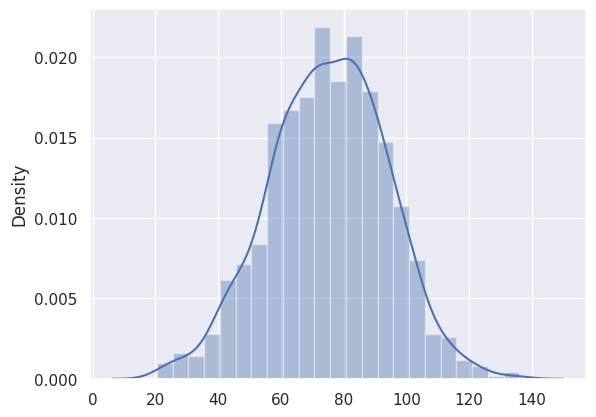

In [ ]:
#Create first population with mean=75 and sd=18 and size = 1000

pop1 = np.random.normal(75, 18, 1000)
print(f'population type: {pop1.dtype}')
#sns.distplot(pop1)
sns.histplot(
    pop1, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

population 2 type: float64


<Axes: ylabel='Density'>

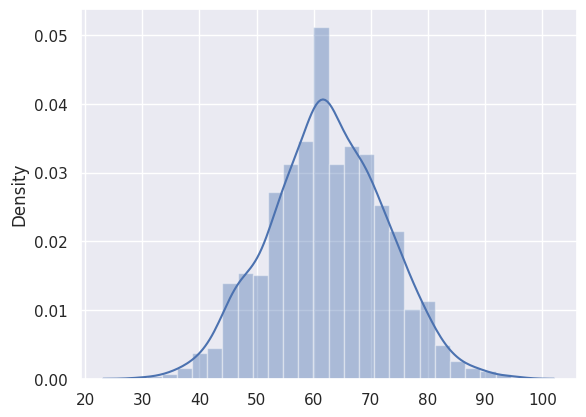

In [ ]:
#Create second population with mean=62 and sd=10 and size = 1000

pop2 = np.random.normal(62, 10, 1000)
print(f'population 2 type: {pop2.dtype}')
#sns.distplot(pop2)
sns.histplot(
    pop2, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [ ]:
stats_pop1 = stats.describe(pop1)

stats_pop2 = stats.describe(pop2)

print(f'Difference between mean of both populations is {stats_pop1[2]-stats_pop2[2]} and variance difference is:  {stats_pop1[3]-stats_pop2[3]}')

Difference between mean of both populations is 12.672426960349483 and variance difference is:  246.17512719578488


In [ ]:
k = 100

sample1 = np.random.choice(pop1,k,replace=True)
print (f"Sample 1 Summary:\n{stats.describe(sample1)}\n\n")

sample2 = np.random.choice(pop2,k,replace=True)
print (f"Sample 2 Summary:\n{stats.describe(sample2)}\n\n")

# test the sample means
print(f't-test: {stats.ttest_ind(sample1, sample2)}\n')

Sample 1 Summary:
DescribeResult(nobs=100, minmax=(38.531149946987334, 136.01345722091816), mean=76.64737991407925, variance=293.1894503946676, skewness=0.37493840318206006, kurtosis=0.8939005810530145)


Sample 2 Summary:
DescribeResult(nobs=100, minmax=(41.75162952946569, 85.06500163433236), mean=62.24954327452139, variance=109.29914520260805, skewness=0.2259958702463998, kurtosis=-0.5383743625091029)


t-test: TtestResult(statistic=7.176628278412914, pvalue=1.4024084901699562e-11, df=198.0)



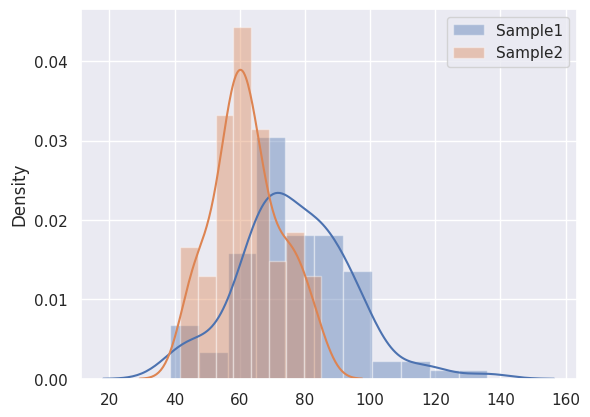

In [ ]:
plt.figure("Test Samples")
sns.histplot(
    sample1, label='Sample1', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

sns.histplot(
    sample2, label='Sample2', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

numTests = 100
alphaSet = [0.000001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.5]
columns = ['err', 'p_val', 'alpha']
sigTests = pd.DataFrame(columns=columns)

# Create 2 populations
##pop1 = np.random.normal(75, 18, 1000)

##pop2 = np.random.normal(62, 10, 1000)

# Create a counter for dataframe index values
counter = 1


# Run the t-test on samples from distribution numTests x alphaSet times

for i in range(1,numTests+1):

    for alpha in alphaSet:

        # take two samples from different populations
            samp1 = np.random.choice(pop1,100,replace=True)
            samp2 = np.random.choice(pop2,100,replace=True)

            # test sample means
            result = stats.ttest_ind(samp1, samp2)

            # Evaluate whether it's possible where we fail to reject Null hypothesis for TYPE II error (result > alpha then type 2 error)
            if result[1] < alpha:
                 sigTests.loc[counter] = [0, result[1], alpha]
            else:
                 sigTests.loc[counter] = [1, result[1], alpha]

            counter += 1

In [ ]:
sigTests

,err,p_val,alpha
1,0.0,8.518489e-09,0.000001
2,0.0,1.982941e-06,0.001000
3,0.0,1.321816e-08,0.010000
4,0.0,1.329423e-08,0.050000
5,0.0,5.179327e-06,0.100000
...,...,...,...
796,0.0,5.858550e-11,0.050000
797,0.0,1.085403e-05,0.100000
798,0.0,2.066461e-09,0.200000
799,0.0,2.233310e-09,0.250000


<Axes: title={'center': 'TYPE II ERROR - FALSE NEGATIVES'}, xlabel='alpha'>

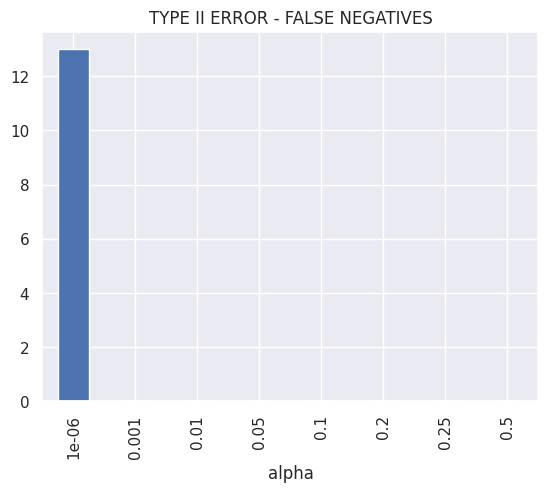

In [ ]:
# group type 2 error by values of alpha
group_error = sigTests.groupby('alpha')['err'].sum()
group_error.plot.bar(title = "TYPE II ERROR - FALSE NEGATIVES")

**Analysis:**

Even Though the real difference exists as means are different in the above example for both populations, still for few cases we failed to reject the null hypothesis (H0) for a very low significance level of 0.000001, hence false negatives. (p-value is more than significance value 0.000001)

Also, alpha or significance level of 25% (0.25), which is a very high value, doesn't give any false negatives and rejects the null hypothesis for all cases (difference exists). With increasing alpha, chances of rejecting H0 increases (fail to reject decreases) which eventually reduces type - 2 errors.




**Question 2**: Choose your own values of population, mean and standard deviation. Find the t-test result and draw the distplot.**(25%)**

In [ ]:
#Write your code below the comment

population 3 type: float64


<Axes: ylabel='Density'>

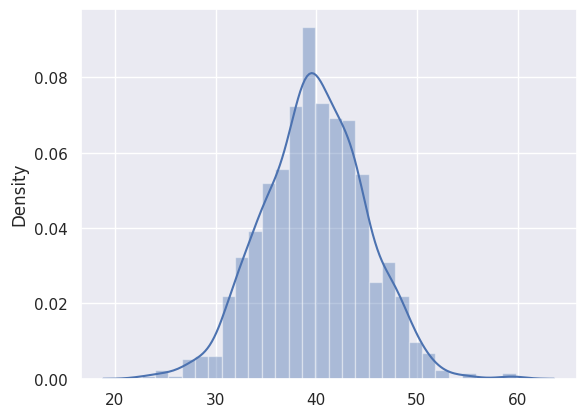

In [ ]:
#a population of 1000 elements with a mean of 40 and a standard deviation of 5

pop3 = np.random.normal(40, 5, 1000)
print(f'population 3 type: {pop3.dtype}')
#sns.distplot(pop3)

sns.histplot(
    pop3, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [ ]:
#t-test

k = 100

sample1 = np.random.choice(pop3,k,replace=True)
print (f"Sample 1 Summary:\n{stats.describe(sample1)}\n\n")

sample2 = np.random.choice(pop3,k,replace=True)
print (f"Sample 2 Summary:\n{stats.describe(sample2)}\n\n")

# test the sample means
print(f'population 3 t-test:\n{stats.ttest_ind(sample1, sample2)}\n')

Sample 1 Summary:
DescribeResult(nobs=100, minmax=(27.55792925748807, 50.08222007999236), mean=39.14933661901514, variance=19.263171582199206, skewness=0.019716833255076043, kurtosis=-0.09964189970266846)


Sample 2 Summary:
DescribeResult(nobs=100, minmax=(28.114888314659034, 55.20936044196335), mean=39.940601274110094, variance=27.241819100287156, skewness=0.2353792218041199, kurtosis=-0.1903112475091997)


population 3 t-test:
TtestResult(statistic=-1.160304524836274, pvalue=0.24732197051504817, df=198.0)



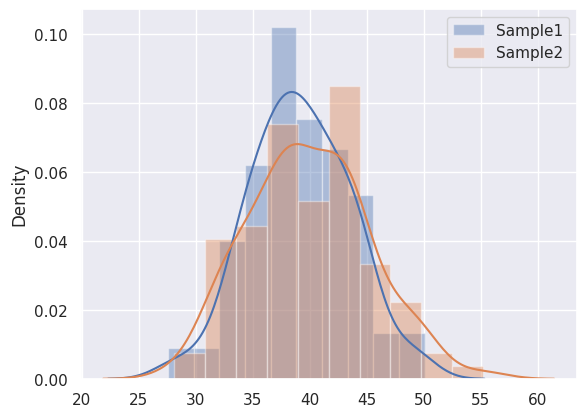

In [ ]:
#distplot (replaced with histplot as distplot is deprecated function)

plt.figure("Test Samples")
#sns.distplot(sample1, label='Sample1')
#sns.distplot(sample2, label='Sample2')
sns.histplot(
    sample1, label='Sample1', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

sns.histplot(
    sample2, label='Sample2', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.legend()
plt.show()

**Question 3**: Explain why a level of 0.05 is chosen as a cut-off for statistical significance?**(10%)**

**Explaination:**

The 5% or 0.05 significance level is really a key factor in controlling type-1 and type-2 errors, and keeps a balance between those errors. In some cases, if we try to decrease significance level, which might result in an increase in type-2 errors. Or if we try to increase alpha, which possibly increases type-1 errors as we have seen in above exercise.

Decreasing alpha would require large samples and might need extra computation and time as well.

For our example of this exercise, 5% fits well and provides a decent trade-off between number of type-1 and type-2 errors.

Definitely, 5% is not the one stop solution which can be used for all kinds of problem statements. There can be multiple parameters which must be considered to set an appropriate significance level, like research context, type of field, sample size, type of data etc, they play an important role to set significance level.
